# K-Nearest Neighbours 

#### Import the necessary modules.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from knearestneighbours import KNearestNeighbours

#### Create a dataset

In [153]:
def function(x, std=0.2):
    noise = std * np.random.normal()
    return np.sin(x) * np.exp(-0.2 * x) + noise


def create_data(number_of_points, function):
    x = np.random.uniform(0, 4 * np.pi, number_of_points)
    y = np.random.uniform(-1, 1, number_of_points)

    features = np.array([x, y]).T
    labels = np.array([0 if j > function(i) else 1 for i, j in zip(x, y)])

    return features, labels

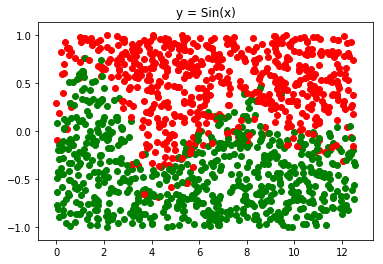

In [154]:
number_of_data = 1250
features, labels = create_data(number_of_data, function)

color = ['red', 'green']

for i in range(features.shape[0]):
    plt.scatter(features[i, 0], features[i, 1], color=color[labels[i]])

plt.title('y = Sin(x)')
plt.show()

#### Split the data set into a training, validation, and testing set.

In [155]:
training_proportion = 0.6
indices = np.array(range(number_of_data))
np.random.shuffle(indices)

training_indices = indices[:int(training_proportion * number_of_data)]
testing_indices = indices[int(training_proportion * number_of_data):]

validation_indices = testing_indices[int(0.5 * len(testing_indices)):]
testing_indices = testing_indices[:int(0.5 * len(testing_indices))]

training_features = features[training_indices]
training_labels = labels[training_indices]
testing_features = features[testing_indices]
testing_labels = labels[testing_indices]
validation_features = features[validation_indices]
validation_labels = labels[validation_indices]

print("Training Length: %d" % len(training_features))
print("Validation Length: %d" % len(validation_features))
print("Testing Length: %d" % len(testing_features))

Training Length: 750
Validation Length: 250
Testing Length: 250


#### Perform a hyperparameter search to find the number of neighbours that give the highest accuracy

Neighbours: 1	 Accuracy: 0.8720
Neighbours: 2	 Accuracy: 0.8680
Neighbours: 3	 Accuracy: 0.9160
Neighbours: 4	 Accuracy: 0.8920
Neighbours: 5	 Accuracy: 0.9240
Neighbours: 6	 Accuracy: 0.9160
Neighbours: 7	 Accuracy: 0.9080
Neighbours: 8	 Accuracy: 0.9120
Neighbours: 9	 Accuracy: 0.9040
Neighbours: 10	 Accuracy: 0.8920
Neighbours: 11	 Accuracy: 0.9000
Neighbours: 12	 Accuracy: 0.9080
Neighbours: 13	 Accuracy: 0.9080
Neighbours: 14	 Accuracy: 0.9080
Neighbours: 15	 Accuracy: 0.9160
Neighbours: 16	 Accuracy: 0.9160
Neighbours: 17	 Accuracy: 0.9040
Neighbours: 18	 Accuracy: 0.9160
Neighbours: 19	 Accuracy: 0.9080
Neighbours: 20	 Accuracy: 0.9160
Neighbours: 21	 Accuracy: 0.9160
Neighbours: 22	 Accuracy: 0.9120
Neighbours: 23	 Accuracy: 0.9160
Neighbours: 24	 Accuracy: 0.9160


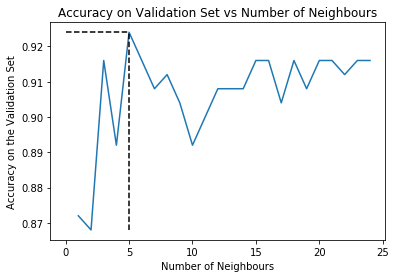

In [160]:
accuracies = []
for k in range(1, 25):
    model = KNearestNeighbours(number_of_neighbours=k)
    model.fit(training_features, training_labels)

    predicted_labels = model.predict(validation_features)
    acc = model.accuracy(validation_labels, predicted_labels)
    
    accuracies.append(acc)
    
    print("Neighbours: %d\t Accuracy: %.4f" % (k, acc))

min_accuracy = min(accuracies)
max_accuracy = max(accuracies)

max_neighbours = np.argmax(accuracies) + 1

plt.plot(list(range(1, 25)), accuracies)
plt.plot([max_neighbours, max_neighbours], [min_accuracy, max_accuracy], 'k--')
plt.plot([0, max_neighbours], [max_accuracy, max_accuracy], 'k--')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy on the Validation Set')
plt.title('Accuracy on Validation Set vs Number of Neighbours')
plt.show()

#### Prediction the labels of the test set, using the optimal number of neighbours value found on the validation set

Optimal number of neighbours: 5
Accuracy on the testing set: 0.9320


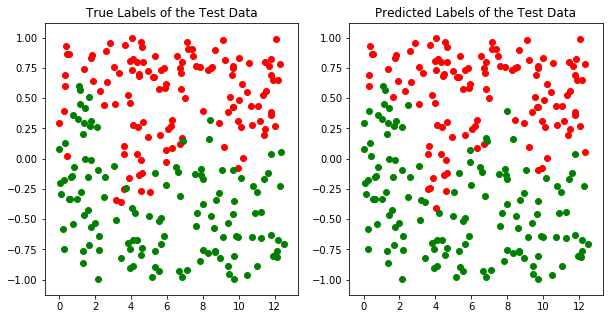

In [161]:
%matplotlib inline
model = KNearestNeighbours(number_of_neighbours=max_neighbours)
model.fit(training_features, training_labels)

predicted_labels = model.predict(testing_features)
acc = model.accuracy(testing_labels, predicted_labels)

print("Optimal number of neighbours: %d" % max_neighbours)
print("Accuracy on the testing set: %.4f" % acc)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((10, 5))

for i, (x, y) in enumerate(testing_features):
    ax[0].scatter(x, y, color=color[testing_labels[i]])
    ax[1].scatter(x, y, color=color[predicted_labels[i]])
    
ax[0].set_title('True Labels of the Test Data')
ax[1].set_title('Predicted Labels of the Test Data')

plt.show()